<a href="https://colab.research.google.com/github/Shalinda99/fyp-HFI-module/blob/main/ntb_bank_plc_Close_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from google.colab import files



drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load the dataset
price_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SP_SL_20_dataset_final.csv')
price_df.head()

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Company Name
0,1/31/2025,120.75,121.5,119.00,119.50,523,1016885,122167426.0,SAMPATH BANK PLC
1,1/30/2025,119.75,120.5,118.75,120.00,587,1279402,152615285.3,SAMPATH BANK PLC
2,1/29/2025,122.00,122.0,118.50,119.25,1354,2563188,307574122.8,SAMPATH BANK PLC
3,1/28/2025,122.00,122.5,121.00,121.25,838,990361,120261351.3,SAMPATH BANK PLC
4,1/27/2025,122.00,123.0,121.50,122.00,694,895710,109462379.0,SAMPATH BANK PLC


In [ ]:
ntb_bank_plc_price_df = price_df[price_df['Company Name'] == "NATIONS TRUST BANK PLC"]

In [ ]:
ntb_bank_plc_price_df['Trade Date'] = pd.to_datetime(ntb_bank_plc_price_df['Trade Date']).dt.date

/tmp/ipython-input-4-2044852740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ntb_bank_plc_price_df['Trade Date'] = pd.to_datetime(ntb_bank_plc_price_df['Trade Date']).dt.date


In [ ]:
ntb_bank_plc_price_df

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Company Name
16542,2025-01-31,192.00,193.0,191.75,192.50,57,76875,14765401.00,NATIONS TRUST BANK PLC
16543,2025-01-30,192.75,193.0,191.00,192.75,93,42248,8128721.75,NATIONS TRUST BANK PLC
16544,2025-01-29,189.00,192.0,188.50,190.25,133,474219,89819023.75,NATIONS TRUST BANK PLC
16545,2025-01-28,188.25,189.0,187.75,188.50,109,191597,36073001.25,NATIONS TRUST BANK PLC
16546,2025-01-27,188.00,189.5,185.00,188.00,127,153020,28719528.25,NATIONS TRUST BANK PLC
...,...,...,...,...,...,...,...,...,...
17714,2020-01-08,79.60,79.6,75.20,77.40,12,2800,216948.10,NATIONS TRUST BANK PLC
17715,2020-01-07,79.90,79.9,79.90,80.00,1,1,79.90,NATIONS TRUST BANK PLC
17716,2020-01-06,80.00,80.0,80.00,80.00,9,3043,243440.00,NATIONS TRUST BANK PLC
17717,2020-01-03,79.60,80.0,79.20,80.00,10,454,36225.70,NATIONS TRUST BANK PLC


In [ ]:
import matplotlib.pyplot as plt

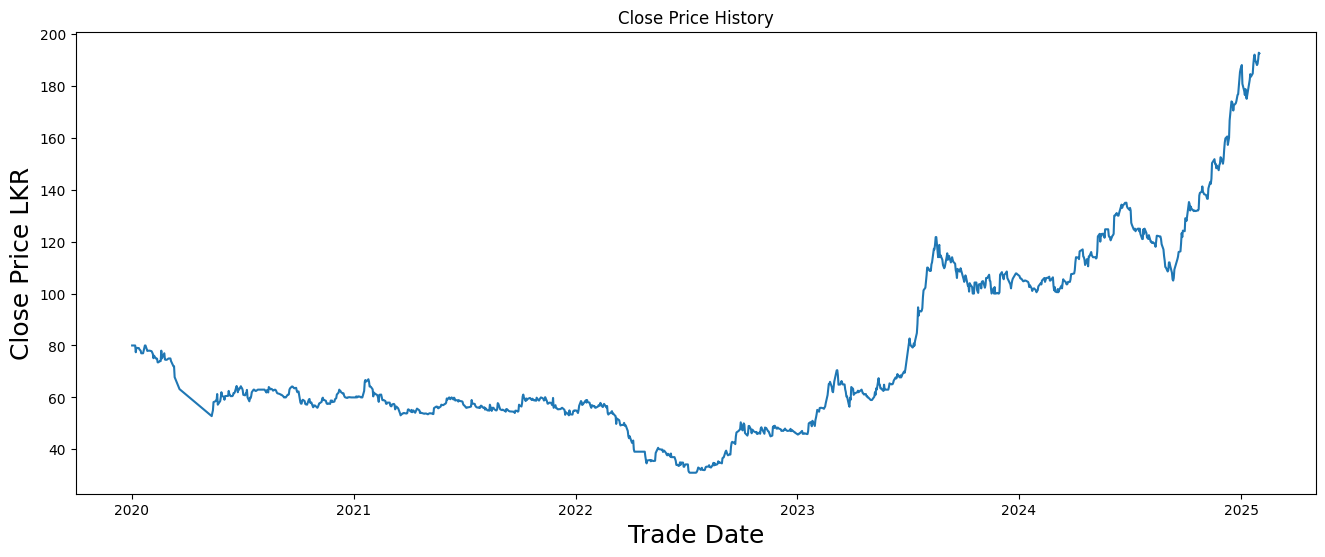

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(ntb_bank_plc_price_df['Trade Date'],ntb_bank_plc_price_df['Close (Rs.)'])
plt.xlabel('Trade Date', fontsize=18)
plt.ylabel('Close Price LKR', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = ntb_bank_plc_price_df.filter(['Close (Rs.)'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1119

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.9984544 ],
       [1.        ],
       [0.98454405],
       ...,
       [0.30293663],
       [0.30293663],
       [0.30293663]])

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.9984544 , 1.        , 0.98454405, 0.97372488, 0.97063369,
       0.98299845, 0.99536321, 0.98763524, 0.97217929, 0.95054096,
       0.94281298, 0.94899536, 0.93508501, 0.89026275, 0.89489954,
       0.91344668, 0.89953632, 0.90880989, 0.92581144, 0.97063369,
       0.96136012, 0.95363215, 0.90108192, 0.89953632, 0.88408037,
       0.87944359, 0.8748068 , 0.86244204, 0.87789799, 0.88253478,
       0.88408037, 0.83925811, 0.79752705, 0.78825348, 0.7805255 ,
       0.80061824, 0.79598145, 0.78670788, 0.76970634, 0.74652241,
       0.73570325, 0.7496136 , 0.7511592 , 0.73570325, 0.73261206,
       0.7202473 , 0.73106646, 0.72488408, 0.73570325, 0.73570325,
       0.74652241, 0.73724884, 0.70015456, 0.6877898 , 0.69242658,
       0.67697063, 0.65224111, 0.65224111, 0.6568779 , 0.66151468])]
[np.float64(0.6630602782071098)]

[array([0.9984544 , 1.        , 0.98454405, 0.97372488, 0.97063369,
       0.98299845, 0.99536321, 0.98763524, 0.97217929, 0.95054096,
       0.94281298, 0.948

In [ ]:
!pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# # Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# # Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=20)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 63s 53ms/step - loss: 0.0020
Epoch 2/20
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - loss: 5.5168e-04
Epoch 3/20
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - loss: 2.6169e-04
Epoch 4/20
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - loss: 2.5908e-04
Epoch 5/20
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - loss: 2.7405e-04
Epoch 6/20
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 55s 52ms/step - loss: 2.8290e-04
Epoch 7/20
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - loss: 2.6499e-04
Epoch 8/20
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 55s 52ms/step - loss: 2.4370e-04
Epoch 9/20
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 55s 52ms/step - loss: 4.8091e-04
Epoch 10/20
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - loss: 1.8716e-04
Epoch 11/20
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - loss: 2.0807e-04
Epoch 12/20
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - loss: 2.1211e-04
Epoch 13/20
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 53s 50ms/step - loss: 2.1911e-04
Epoch 14/20
1059/1059 ━━━

In [ ]:
model.save('/content/drive/My Drive/FYP/ntb_bank_plc_lstm_model.h5')

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 415ms/step


np.float64(2.389353046358803)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

R-squared: 0.9079563184488016


/tmp/ipython-input-16-1041969288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


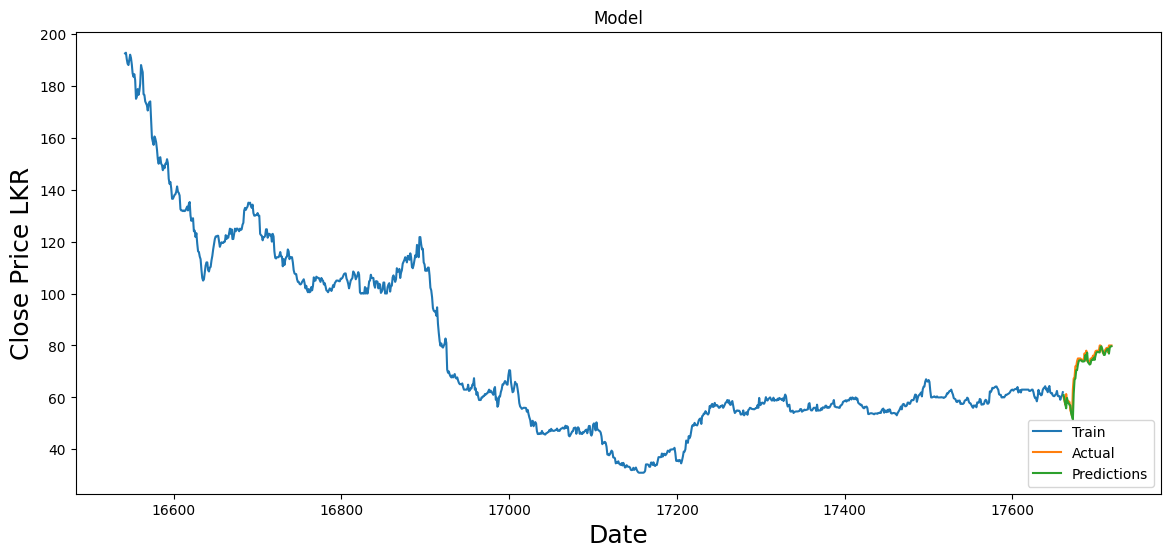

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(14,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price LKR', fontsize=18)
plt.plot(train['Close (Rs.)'])
plt.plot(valid[['Close (Rs.)', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()